##### My goal herein is to perform an end-to-end machine learning project, using insurance beneficiary information to build a model of insurance costs. My model should learn from this data and be able to predict the insurance costs, given all the other metrics. This will be a supervised learning, multiple, univariate regression task. The model I will be using will be Random Forest. My focus herein is to carefully go through each step that is required of an end-to-end machine learning project. I acknowledge that other models can and should be used and compared with each other.

##### The performance measure I will be using will be the Root Mean Square Error (RMSE). The RMSE gives an idea of how much error the system typically makes in its predictions, with a higher weight given to large errors. The equation below shows the mathemetical formula to compute the RMSE.

$ RMSE(X, h) = \sqrt {\frac{1}{m} \sum \limits _{i=1} ^m (h(x^{(i)}) - y^{(i)})^{2}} $

##### Steps of this project are taken based on Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition, by Aurelien Geron

# Get the Data

In [1]:
# Download the data
import pandas as pd
data = pd.read_csv('insurance.csv')
# Take a look at the top five rows of the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis (and Preliminary Data Preparation)

In [2]:
# The info() method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of non-null
# values
data.info()
# There are a total of 1338 rows and all the values are non-null. This means that we do not have any mising values. Some attributes are numerical (with dtype as 
# integer or float), and others are objects. When the type of an attribute is said to be object, this means that it could hold any kind of Python object. But
# since I loaded this data from a CSV file, I know that it must be a text attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# The 'sex' attribute is a categorical attribute. Find out what categories exist and how many beneficiaries belong to each category by using the value_counts()
# method.
data['sex'].value_counts()
# There are 14 more males than females in the dataset

male      676
female    662
Name: sex, dtype: int64

In [4]:
# The 'smoker' attribute is a categorical attribute. Find out what categories exist and how many beneficiaries belong to each category by using the value_counts()
# method.
data['smoker'].value_counts()
# There are many more non-smokers that smokers in the dataset

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
# The 'region' attribute is a categorical attribute. Find out what categories exist and how many beneficiaries belong to each category by using the value_counts()
# method.
data['region'].value_counts()
# The beneficiares are quite evenly spread out

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [6]:
# The describe() method shows a summary of the numerical attributes
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


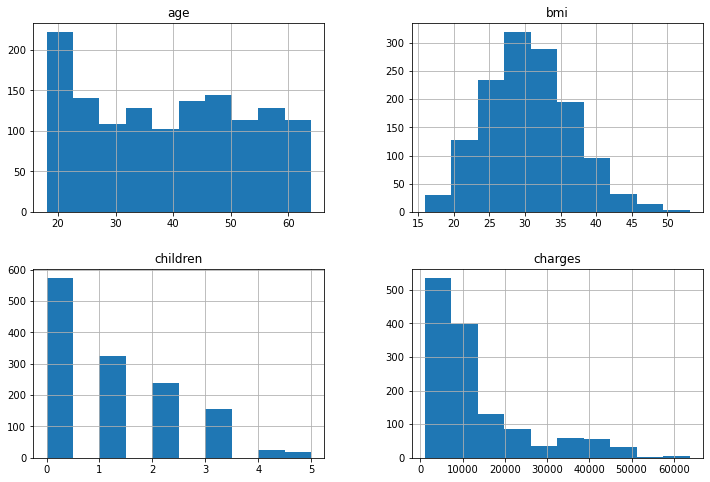

In [7]:
import matplotlib.pyplot as plt
# Plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal
# axis).
data.hist(figsize=(12,8))
plt.show()
# The attributes have different scales, which means we will have to do feature scaling later. Some of the histograms are also skewed. This may make it a bit
# harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more symmetrical and bell-shaped
# distributions. Note that the bmi attribute looks fairly symmetrical and bell-shaped.

In [8]:
# Partition the dataset into a training set and a test set. The test set is a sample of the data that we hold back from our analysis and modeling. We use it right
# at the end of our project to confirm the performance of our final model. It is the final test that gives us confidence on our estimates of accuracy on unseen
# data. We will use 80% of the dataset for modeling and use 20% for testing.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=23)
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

In [9]:
# Look for correlations. Compute the standard correlation coefficient between every pair of attributes using the corr() method
train_set.corr()

,age,bmi,children,charges
age,1.000000,0.108683,0.043798,0.279545
bmi,0.108683,1.000000,0.018961,0.204383
children,0.043798,0.018961,1.000000,0.059863
charges,0.279545,0.204383,0.059863,1.000000


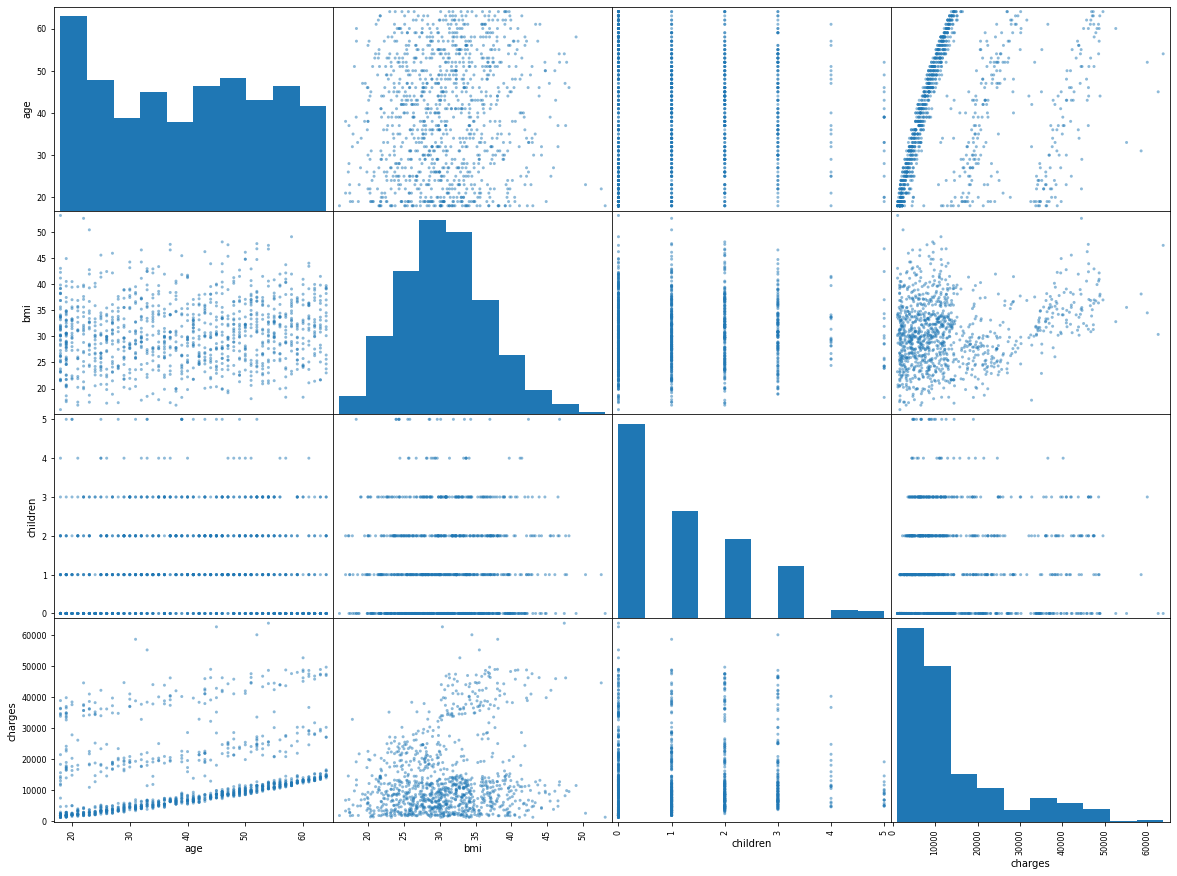

In [10]:
# Another way to check for correlation between attributes is to use the Pandas scatter_matrix() function, which plots every numerical attribute against every
# other numerical attribute.
from pandas.plotting import scatter_matrix
scatter_matrix(train_set, figsize=(20, 15))
plt.show()

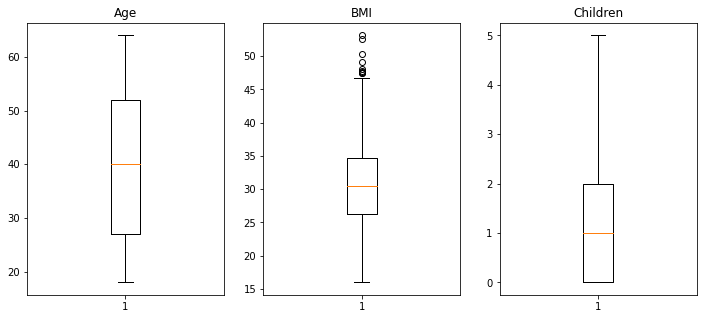

In [11]:
# Plot boxplots to vizualize the distribution of data for my numerical attributes and check for outliers. I will later need to do feature scaling for my numerical
# attributes. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. Most models will
# be biased towards ignoring input numerical attributes with very small scales, and focusing more on input numerical attributes with very large scales. The two
# common ways to get all attributes to have the same scale are min-max scaling and standardization. min-max scaling binds values to a specific range, whereas
# standardization does not. This means that standardization is much less affected by outliers. I will plot boxplots to vizualize the distribution of data for my
# numerical attributes and check for outliers
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12,5))
ax1.boxplot(train_set['age'])
ax1.set_title('Age')
ax2.boxplot(train_set['bmi'])
ax2.set_title('BMI')
ax3.boxplot(train_set['children'])
ax3.set_title('Children')
plt.show()
# The BMI attribute has a good number of outliers. I will use standardization rather than min-max scaling.

# Data Preparation

In [13]:
# Revert to a clean training set (by copying the training set once again). We separate the predictors and the labels, since we don’t necessarily want to apply the
# same transformations to the predictors and the target values
insurance = train_set.drop('charges', axis=1)
insurance_labels = train_set['charges'].copy()

In [14]:
# I will create a column transformer that will perform the following two transformations: 1) standardize all numerical features, and 2) convert the
# categorical attributes from text to numbers by creating one binary attribute per category. Scikit-Learn provides a OneHotEncoder class to convert categorical
# values into one-hot vectors. By default, the output of a OneHotEncoder is a SciPy sparse matrix, instead of a NumPy array. Setting sparse=False when creating
# the OneHotEncoder makes the transform() method return a regular NumPy array directly.
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse=False))
preprocessing = make_column_transformer((num_pipeline, make_column_selector(dtype_include=np.number)),
                                        (cat_pipeline, make_column_selector(dtype_include=np.object)))

C:\Users\marcu\AppData\Local\Temp\ipykernel_4204\2011448536.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (cat_pipeline, make_column_selector(dtype_include=np.object)))


In [15]:
# Confirm that this ColumnTransformer works by applying it to the housing data. A NumPy array will be returned, but I can get the column names using
# preprocessing.get_feature_names_out() and wrap the data in a DataFrame.
insurance_prepared = preprocessing.fit_transform(insurance)
df_insurance_prepared = pd.DataFrame(insurance_prepared, columns=preprocessing.get_feature_names_out(), index=insurance.index)
df_insurance_prepared.head()

,pipeline-1__age,pipeline-1__bmi,pipeline-1__children,pipeline-2__sex_female,pipeline-2__sex_male,pipeline-2__smoker_no,pipeline-2__smoker_yes,pipeline-2__region_northeast,pipeline-2__region_northwest,pipeline-2__region_southeast,pipeline-2__region_southwest
0,-0.609880,-0.045031,1.548604,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.099169,1.049512,-0.897764,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.609880,-0.350635,-0.082308,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.040197,-1.206324,1.548604,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.464405,-0.809040,-0.082308,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Cross Validation and Model Fine-Tuning

In [16]:
# I will use the Random Forest model. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions.
# We don’t want to touch the test set until we are ready to launch a model we are confident about, so we need to use part of the training set for training and 
# part of it for model validation, which I will do by doing K-fold cross-validation. I will randomly split the training set into 10 distinct subsets (folds), then
# train it and evaluate the Random Forest model 10 times, picking a different fold for evaluation every time and training on the other 9 folds.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=12))
forest_rmses = -cross_val_score(forest_reg, insurance, insurance_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()
# The Random Forest model has an RMSE of about 4804.

count      10.000000
mean     4804.316312
std       550.623544
min      3876.331256
25%      4601.249404
50%      4837.573911
75%      5185.355390
max      5638.424056
dtype: float64

In [17]:
# My model above had max_features equal to the number of features of my input data. I will fine-tune my model, going through different values of this
# hyperparameter and then choosing the one that will bring about the lowest RMSE. I will use Scikit-Learn's GridSearchCV class, which works by letting it know 
# which hyperparameter I want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible hyperparameter
# values.
from sklearn.model_selection import GridSearchCV
full_pipeline = make_pipeline(preprocessing, RandomForestRegressor(random_state=12))
param_grid = {'randomforestregressor__max_features': [1,2,3,4,5,6,7,8,9,10,11]}
grid_search = GridSearchCV(full_pipeline, param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(insurance, insurance_labels)
grid_search.best_params_
# The best model is obtained by setting max_features to 5.

{'randomforestregressor__max_features': 5}

In [18]:
# The evaluation scores are available using grid_search.cv_results_. This is a dictionary, but if I wrap it in a DataFrame, I get a nice list of all the test
# scores for each hyperparameter value and for each cross-validation split, as well as the mean test score across all splits.
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.rename(columns={'mean_test_score': 'mean_test_rmse'}, inplace=True)
cv_res['mean_test_rmse'] = -cv_res['mean_test_rmse']
cv_res
# The mean test RMSE score for the best model is 4,705, which is better than the score I got earlier using the default hyperparameter value (which was 4,804). I
# have successfully fine-tuned my best model.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_rmse,std_test_score,rank_test_score
4,0.124232,0.001944,0.001662,0.004662,5,{'randomforestregressor__max_features': 5},-4723.859394,-4428.586226,-5060.925002,-5453.666297,-3599.777443,-3752.821279,-5503.001677,-4453.325439,-5094.574008,-4979.764693,4705.030146,618.022297,1
5,0.129062,0.005404,0.003126,0.006251,6,{'randomforestregressor__max_features': 6},-4691.045355,-4583.920826,-5179.804404,-5601.175678,-3608.042126,-3808.590679,-5471.774216,-4361.917177,-5040.269831,-4852.961580,4719.950187,623.538543,2
3,0.110511,0.006348,0.005385,0.007004,4,{'randomforestregressor__max_features': 4},-4629.160981,-4540.272367,-5112.761961,-5476.276513,-3630.390907,-3806.858993,-5599.562372,-4370.605665,-5100.549266,-4990.024202,4725.646323,624.576874,3
6,0.131726,0.007389,0.009375,0.007655,7,{'randomforestregressor__max_features': 7},-4596.353097,-4520.887645,-5097.405178,-5557.229640,-3799.248238,-3785.352047,-5440.039923,-4486.025579,-5045.800960,-4935.582533,4726.392484,578.367358,4
7,0.143307,0.006002,0.007807,0.007807,8,{'randomforestregressor__max_features': 8},-4667.223737,-4732.437068,-5124.630512,-5621.063696,-3817.639902,-3835.749335,-5439.819363,-4383.596386,-4996.707744,-4865.609410,4748.447715,574.083486,5
8,0.149243,0.007531,0.009379,0.007658,9,{'randomforestregressor__max_features': 9},-4655.051103,-4747.612437,-5131.194800,-5660.487325,-3943.100355,-3907.983485,-5342.389019,-4509.135904,-5027.907908,-4868.408574,4779.327091,532.446182,6
2,0.105775,0.003527,0.006123,0.003095,3,{'randomforestregressor__max_features': 3},-4704.723896,-4614.269593,-5183.639789,-5431.704916,-3626.944741,-4033.938241,-5659.324515,-4442.396344,-5120.077611,-5042.925789,4785.994543,598.208430,7
9,0.159878,0.003298,0.007790,0.007165,10,{'randomforestregressor__max_features': 10},-4691.761012,-4785.560669,-5240.726321,-5668.631002,-4007.953320,-3868.797039,-5322.236666,-4516.526250,-5017.294963,-4862.493644,4798.198089,534.727890,8
10,0.162318,0.006184,0.009255,0.005895,11,{'randomforestregressor__max_features': 11},-4724.535939,-4845.605961,-5245.751124,-5638.424056,-4016.436221,-3876.331256,-5302.214620,-4560.153892,-5004.168191,-4829.541860,4804.316312,522.367359,9
1,0.096253,0.004752,0.005489,0.007039,2,{'randomforestregressor__max_features': 2},-4752.214956,-4765.789817,-5270.269417,-5659.151509,-3761.889653,-4201.600104,-6043.730282,-4704.393006,-5323.653343,-5246.220924,4972.891301,642.566848,10


In [20]:
# Indicate the relative importance of each attribute for making accurate predictions. Sort the importance scores in descending order and display them next to 
# their corresponding attribute names.
final_model = grid_search.best_estimator_
feature_importances = final_model['randomforestregressor'].feature_importances_
df_feature_importances = pd.DataFrame(sorted(zip(feature_importances, final_model['columntransformer'].get_feature_names_out()), reverse=True))
df_feature_importances.rename(columns={0:'Importance Score', 1: 'Feature'}, inplace=True)
df_feature_importances = df_feature_importances[['Feature', 'Importance Score']]
df_feature_importances
# The most important features are the gender of the insurance contractor and his/her BMI

,Feature,Importance Score
0,pipeline-2__smoker_yes,0.337271
1,pipeline-2__smoker_no,0.294312
2,pipeline-1__bmi,0.183236
3,pipeline-1__age,0.133021
4,pipeline-1__children,0.022060
5,pipeline-2__region_southeast,0.006545
6,pipeline-2__region_northwest,0.005751
7,pipeline-2__region_northeast,0.005223
8,pipeline-2__sex_female,0.004448
9,pipeline-2__sex_male,0.004270


# Evaluate My Model on the Test Set

In [21]:
from sklearn.metrics import mean_squared_error
x_test = test_set.drop('charges', axis=1)
y_test = test_set['charges'].copy()
final_predictions = final_model.predict(x_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse
# The test RMSE is 4,537, which is lower than the validation RMSE, which was 4,705

4537.305444249299